In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import pandas as pd
import random
import re

In [3]:
1 + 1

2

библиотеки

In [3]:
data = pd.read_csv('statick//train.csv')
data = data[['sc_h', 'sc_w']].copy()
mass = data.to_numpy()

In [4]:
count_point = 10
mass = []
for i in range(count_point):
    mass.append([random.randrange(0, 10), random.randrange(0, 10)])

In [44]:
mass = [[9, 6], [0, 7], [7, 5], [9, 8], [1, 8], [9, 3], [0, 8], [8, 1], [0, 2], [3, 7]]

In [52]:
MASS = []
jj = [[6.32, 1.47], [0.0, 7.0]]
for i in mass:
    ma = []
    for j in jj:
        ma.append(round(math.sqrt((i[0] - j[0]) ** 2 + (i[1] - j[1]) ** 2), 2))
    if ma[0] > ma[1]:
        ma.append(1)
    else:
        ma.append(2)
    MASS.append(ma)
for i in MASS:
    st = str(i[2])
    st = st.replace('.', ',')
    print(st)

2
1
2
2
1
2
1
2
1
1


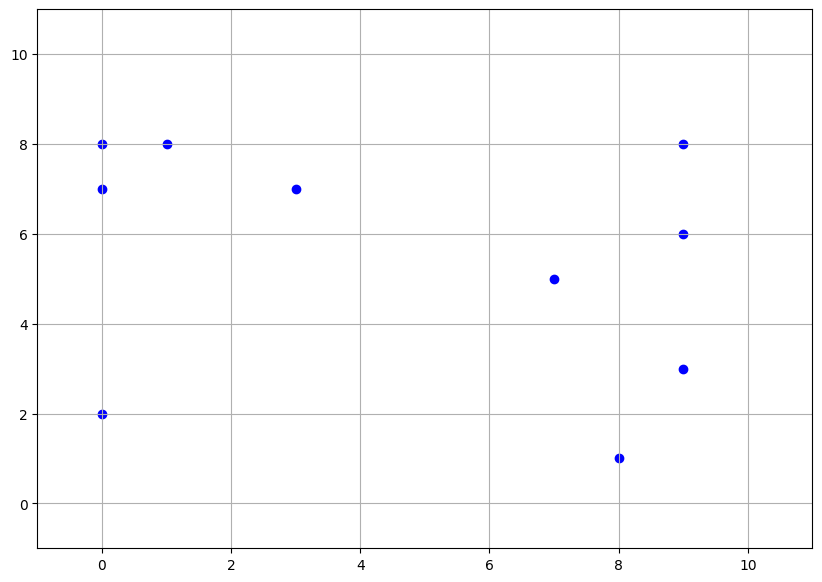

In [45]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()

for i in mass:
    ax.scatter(i[0], i[1], color='b')

ax.grid()
plt.xlim([-1, 11])
plt.ylim([-1, 11])
plt.show()

визуализируем наши точки

In [11]:
mass_collor = ['#000000', '#808080', '#FF00FF', '#32CD32', '#800000',
               '#FFFF00', '#808000', '#00FF00', '#008000', '#0000FF']

задаём количество групп

[[6.32, 1.47]]
[[6.32, 1.47]]
0 ||||
9  | 0
6  | 1

0  | 0
7  | 1

7  | 0
5  | 1

9  | 0
8  | 1

1  | 0
8  | 1

9  | 0
3  | 1

0  | 0
8  | 1

8  | 0
1  | 1

0  | 0
2  | 1

3  | 0
7  | 1

10
4.6
5.5
Schedule number 1


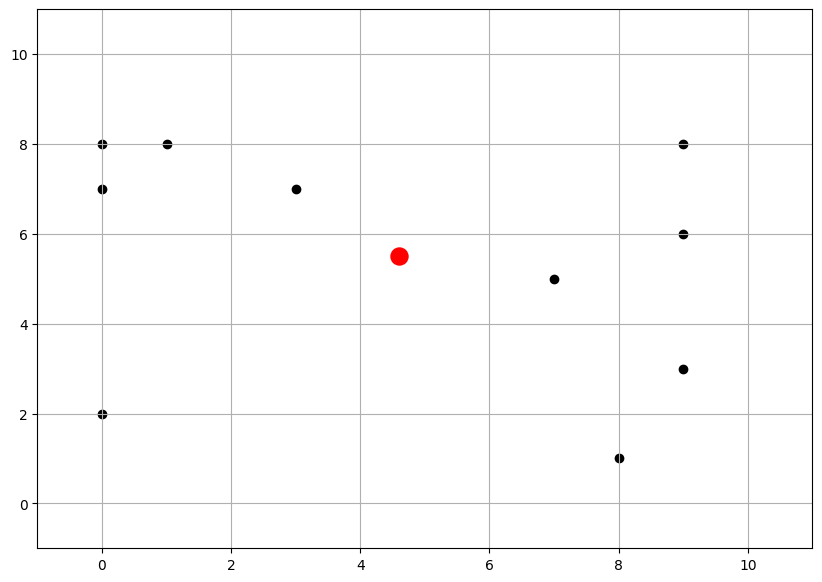

[[4.43], [4.84], [2.45], [5.06], [4.38], [5.06], [5.24], [5.64], [5.78], [2.19]]
[[4.6, 5.5], [0, 2]]
0 ||||
9  | 0
6  | 1

0  | 0
7  | 1

7  | 0
5  | 1

9  | 0
8  | 1

1  | 0
8  | 1

9  | 0
3  | 1

0  | 0
8  | 1

8  | 0
1  | 1

3  | 0
7  | 1

9
5.111111111111111
5.888888888888889
1 ||||
0  | 0
2  | 1

1
0.0
2.0
Schedule number 2


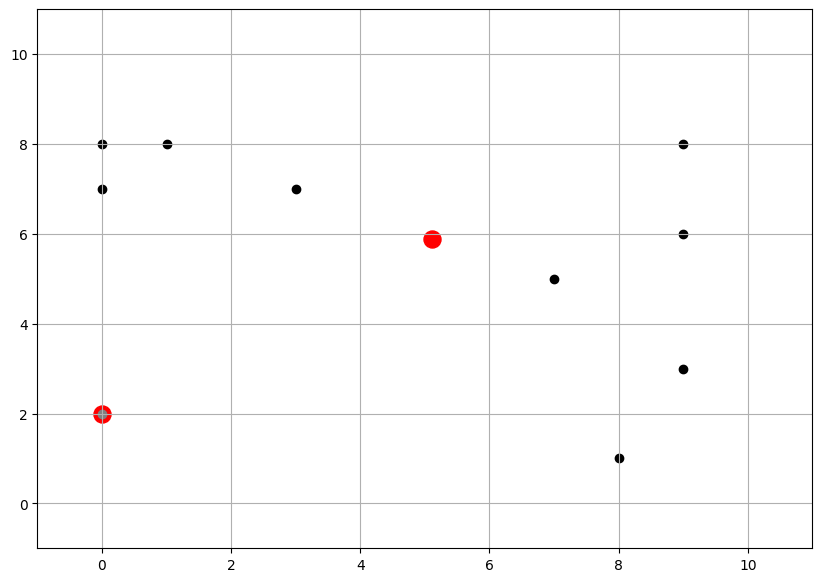

In [48]:
min = 1
max = 3
mass_elbow_value = []
# задаём начальную точку
# cluster_centers = [[round(random.uniform(0.0, 10.0), 2), round(random.uniform(0.0, 10.0), 2)]]
cluster_centers = [[6.32, 1.47]]
# [[6.32, 1.47]]
print(cluster_centers)
# цикл для определения коилчество кластеров "методом локтя"
for k in range(min, max):
    # для создания точки для определения нового кластера кластера
    if k != 1:
        # считаем евклидово расстояние до каждых точек относительно центра кластера 
        new_mass_point_to_claster = []
        for i in mass:
            new_euclidean_distances = []
            for j in cluster_centers:
                new_euclidean_distances.append(round(math.sqrt((i[0] - j[0]) ** 2 + (i[1] - j[1]) ** 2), 2))
            new_mass_point_to_claster.append(new_euclidean_distances)
        print(new_mass_point_to_claster)
        maximum = [-1, -1]
        # выбираем самую дальнюю точку
        for i in range(len(new_mass_point_to_claster)):
            long = 0
            for j in new_mass_point_to_claster[i]:
                long += j
            if long > maximum[0] and mass[i] not in cluster_centers:
                maximum = [long, i]
        # добавляем коодинаты новой точки
        cluster_centers.append(mass[maximum[-1]])
    print(cluster_centers)
    mass_point_to_claster = []

    # расчитываем центры кластеров
    for i in mass:
        euclidean_distances = []
        for j in cluster_centers:
            euclidean_distances.append(round(math.sqrt((i[0] - j[0]) ** 2 + (i[1] - j[1]) ** 2), 2))
        mass_point_to_claster.append(euclidean_distances)
    for i in range(len(mass_point_to_claster)):
        minimum = 999999
        numer = -1
        for j in range(len(mass_point_to_claster[i])):
            if mass_point_to_claster[i][j] < minimum:
                minimum = mass_point_to_claster[i][j]
                numer = j + 1
        mass_point_to_claster[i] = numer
    #     определяем центры кластеров
    for i in range(len(cluster_centers)):
        print(f"{i} ||||")
        count = 0
        x_ = 0
        y_ = 0
        for j in range(len(mass)):
            if mass_point_to_claster[j] == i + 1:
                count += 1
                x_ += mass[j][0]
                y_ += mass[j][1]
                print(mass[j][0], ' | 0')
                print(mass[j][1], ' | 1')
                print()
        print(count)
        cluster_centers[i][0] = x_ / count
        cluster_centers[i][1] = y_ / count
        print(cluster_centers[i][0])
        print(cluster_centers[i][1])

    # рисуем график и раскрашиваем точки
    fig = plt.figure(figsize=(10, 7))
    ax1 = fig.add_subplot()
    for i in range(k):
        count = 0
        x_ = 0
        y_ = 0
        for j in range(len(mass)):
            if mass_point_to_claster[j] == i + 1:
                count += 1
                x_ += mass[j][0]
                y_ += mass[j][1]
        x_ = x_ / count
        y_ = y_ / count
        cluster_centers[i][0] = x_
        cluster_centers[i][1] = y_
        ax1.scatter(x_, y_, c='r', s=150)
    for i in range(len(mass_point_to_claster)):
        ax1.scatter(mass[i][0], mass[i][1], c=mass_collor[mass_point_to_claster[i] - 1])
    #     plt.axis([-1, 11, -1, 11])
    ax1.grid()
    print(f'Schedule number {k}')
    plt.xlim([-1, 11])
    plt.ylim([-1, 11])
    plt.show()

    elbow_value = 0
    for i in range(k):
        for j in range(len(mass)):
            if mass_point_to_claster[j] == i + 1:
                elbow_value += round(math.sqrt((cluster_centers[i][0] - mass[j][0]) ** 2 +
                                               (cluster_centers[i][1] - mass[j][1]) ** 2), 2)
    mass_elbow_value.append(elbow_value)#%%

In [ ]:
1 + 1

библиотеки

In [ ]:
data = pd.read_csv('statick//train.csv')
data = data[['sc_h', 'sc_w']].copy()
mass = data.to_numpy()

In [ ]:
count_point = 10
mass = []
for i in range(count_point):
    mass.append([random.randrange(0, 10), random.randrange(0, 10)])

In [141]:
mass = [[9, 6], [0, 7], [7, 5], [9, 8], [1, 8], [9, 3], [0, 8], [8, 1], [0, 2], [3, 7]]

In [ ]:
MASS = []
jj = [[6.32, 1.47], [0.0, 7.0]]
for i in range(mass):
    ma = []
    for j in jj:
        ma.append(round(math.sqrt((i[0] - j[0]) ** 2 + (i[1] - j[1]) ** 2), 2))

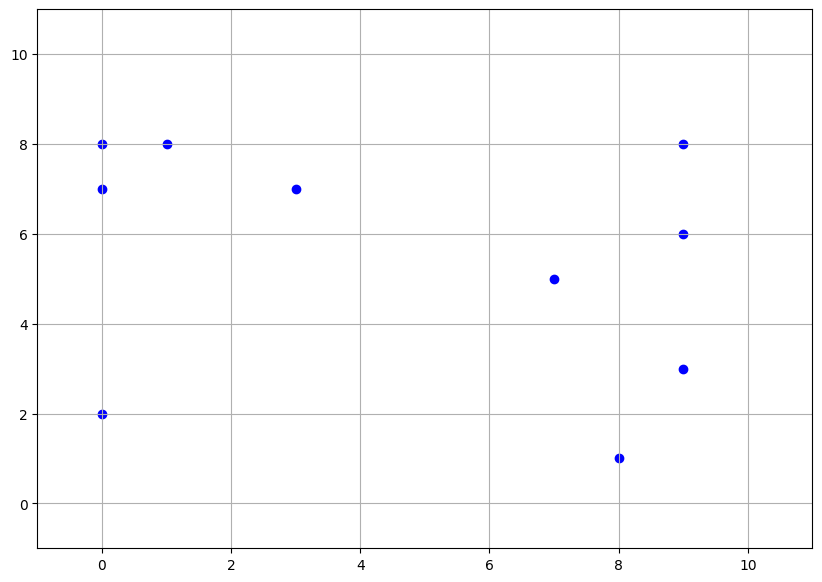

In [142]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()

for i in mass:
    ax.scatter(i[0], i[1], color='b')

ax.grid()
plt.xlim([-1, 11])
plt.ylim([-1, 11])
plt.show()

визуализируем наши точки

In [ ]:
mass_collor = ['#000000', '#808080', '#FF00FF', '#32CD32', '#800000',
               '#FFFF00', '#808000', '#00FF00', '#008000', '#0000FF']

задаём количество групп

[[6.32, 1.47]]
[[6.32, 1.47]]
Schedule number 1


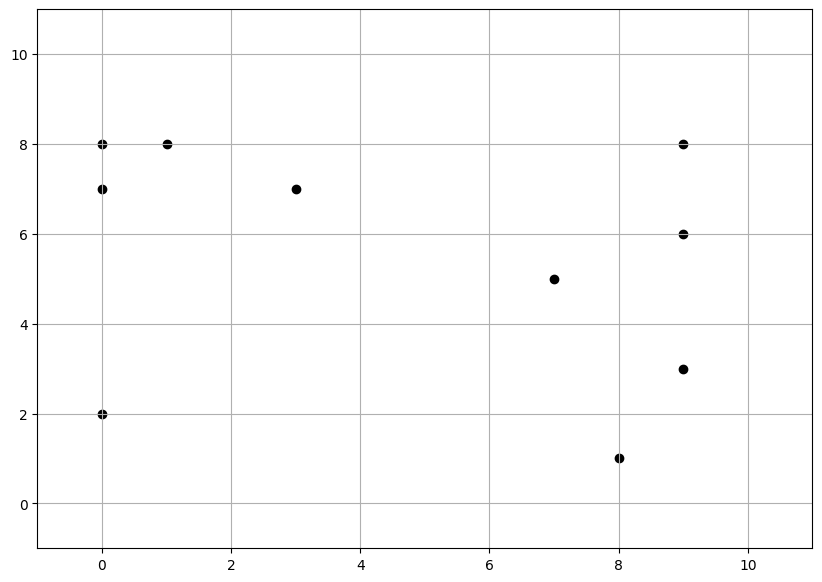

[[4.43], [4.84], [2.45], [5.06], [4.38], [5.06], [5.24], [5.64], [5.78], [2.19]]
[[4.6, 5.5], [0, 2]]
Schedule number 2


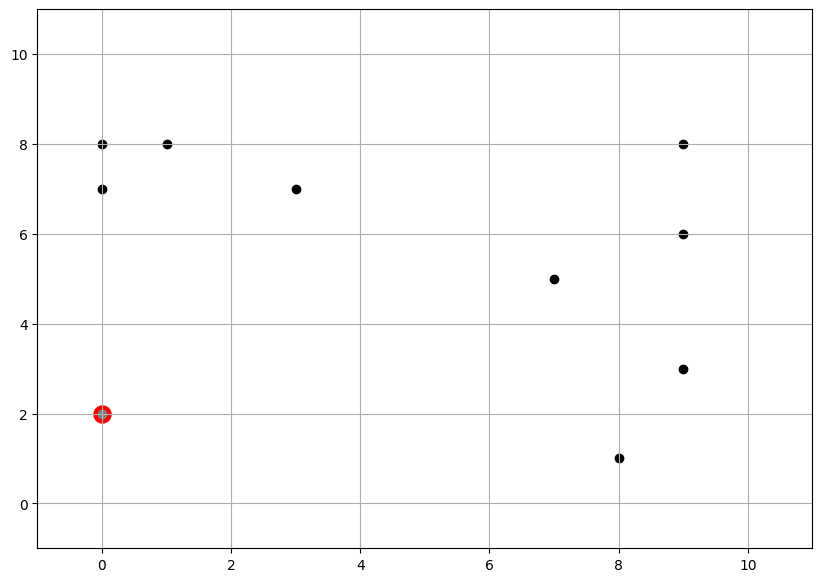

[[3.89, 9.85], [5.23, 5.0], [2.09, 7.62], [4.42, 10.82], [4.62, 6.08], [4.84, 9.06], [5.53, 6.0], [5.68, 8.06], [6.42, 0.0], [2.39, 5.83]]
[[5.111111111111111, 5.888888888888889], [0, 2.0], [9, 8]]
Schedule number 3


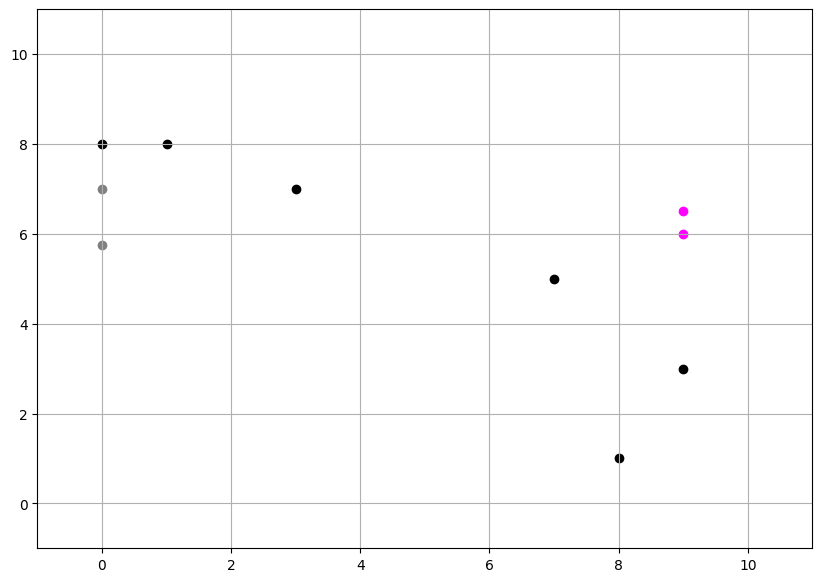

[[4.38, 9.0, 0.5], [4.96, 1.25, 9.01], [2.36, 7.04, 2.5], [4.49, 9.03, 0.0], [4.53, 2.46, 8.14], [4.92, 9.41, 3.5], [5.37, 2.25, 9.12], [5.47, 9.3, 5.59], [4.69, 0.0, 9.03], [2.36, 3.25, 6.02]]
[[4.666666666666667, 5.333333333333333], [0, 5.75], [9.0, 6.5], [8, 1]]
Schedule number 4


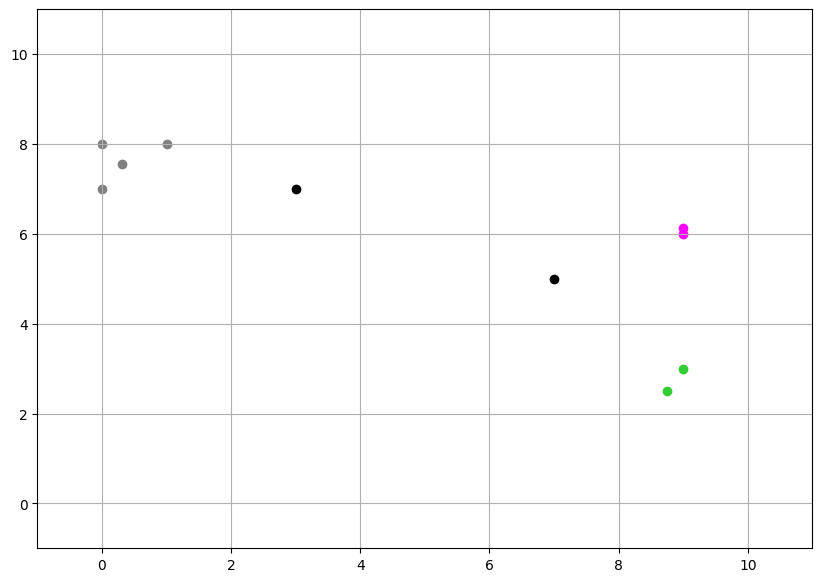

[[4.0, 8.82, 0.12, 3.51], [5.1, 0.63, 9.04, 9.84], [2.24, 7.16, 2.29, 3.05], [4.0, 8.8, 0.0, 3.63], [4.47, 0.82, 8.22, 9.5], [5.0, 9.81, 3.12, 0.56], [5.39, 0.55, 9.19, 10.34], [5.13, 9.83, 3.63, 0.0], [4.94, 0.0, 8.8, 9.83], [2.24, 2.74, 6.06, 7.3]]
[[5.0, 6.0], [0.3125, 7.546875], [9.0, 6.125], [8.75, 2.5], [0, 8]]
Schedule number 5


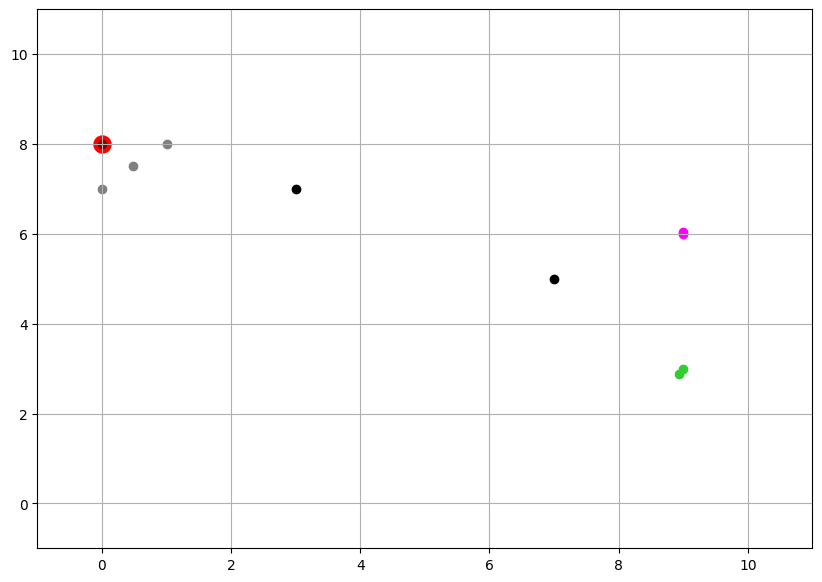

In [143]:
min = 1
max = 6
mass_elbow_value = []
# задаём начальную точку
# cluster_centers = [[round(random.uniform(0.0, 10.0), 2), round(random.uniform(0.0, 10.0), 2)]]
cluster_centers = [[6.32, 1.47]]
# [[6.32, 1.47]]
print(cluster_centers)
# цикл для определения коилчество кластеров "методом локтя"
for k in range(min, max):
    # для создания точки для определения нового кластера кластера
    if k != 1:
        # считаем евклидово расстояние до каждых точек относительно центра кластера
        new_mass_point_to_claster = []
        for i in mass:
            new_euclidean_distances = []
            for j in cluster_centers:
                new_euclidean_distances.append(round(math.sqrt((i[0] - j[0]) ** 2 + (i[1] - j[1]) ** 2), 2))
            new_mass_point_to_claster.append(new_euclidean_distances)
        print(new_mass_point_to_claster)
        maximum = [-1, -1]
        # выбираем самую дальнюю точку
        for i in range(len(new_mass_point_to_claster)):
            long = 0
            for j in new_mass_point_to_claster[i]:
                long += j
            if long > maximum[0] and mass[i] not in cluster_centers:
                maximum = [long, i]
        # добавляем коодинаты новой точки
        cluster_centers.append(mass[maximum[-1]])
    print(cluster_centers)
    mass_point_to_claster = []

    # расчитываем центры кластеров
    for i in mass:
        euclidean_distances = []
        for j in cluster_centers:
            euclidean_distances.append(round(math.sqrt((i[0] - j[0]) ** 2 + (i[1] - j[1]) ** 2), 2))
        mass_point_to_claster.append(euclidean_distances)
    for i in range(len(mass_point_to_claster)):
        minimum = 999999
        numer = -1
        for j in range(len(mass_point_to_claster[i])):
            if mass_point_to_claster[i][j] < minimum:
                minimum = mass_point_to_claster[i][j]
                numer = j + 1
        mass_point_to_claster[i] = numer
    #     определяем центры кластеров
    for i in range(len(cluster_centers)):
        count = 0
        x_ = 0
        y_ = 0
        for j in range(len(mass)):
            if mass_point_to_claster[j] == i + 1:
                count += 1
                x_ += mass[j][0]
                y_ += mass[j][1]
        cluster_centers[i][0] = x_ / count
        cluster_centers[i][1] = y_ / count

    # рисуем график и раскрашиваем точки
    fig = plt.figure(figsize=(10, 7))
    ax1 = fig.add_subplot()
    for i in range(k):
        count = 0
        x_ = 0
        y_ = 0
        for j in range(len(mass)):
            if mass_point_to_claster[j] == i + 1:
                count += 1
                x_ += mass[j][0]
                y_ += mass[j][1]
        if x_ != 0:
            cluster_centers[i][0] = x_/count
        else:
            cluster_centers[i][0] = 0
        if y_ != 0:
            cluster_centers[i][1] = y_/count
        else:
            cluster_centers[i][1] = 0
        ax1.scatter(x_, y_, c='r', s=150)
    for i in range(len(mass_point_to_claster)):
        ax1.scatter(mass[i][0], mass[i][1], c=mass_collor[mass_point_to_claster[i] - 1])
    #     plt.axis([-1, 11, -1, 11])
    ax1.grid()
    print(f'Schedule number {k}')
    plt.xlim([-1, 11])
    plt.ylim([-1, 11])
    plt.show()


    elbow_value = 0
    for i in range(k):
        for j in range(len(mass)):
            if mass_point_to_claster[j] == i + 1:
                elbow_value += round(math.sqrt((cluster_centers[i][0] - mass[j][0]) ** 2 +
                                               (cluster_centers[i][1] - mass[j][1]) ** 2), 2)
    mass_elbow_value.append(elbow_value)


1 кластер = 45.06999999999999
2 кластер = 38.69
3 кластер = 26.759999999999998
4 кластер = 7.16
5 кластер = 6.07


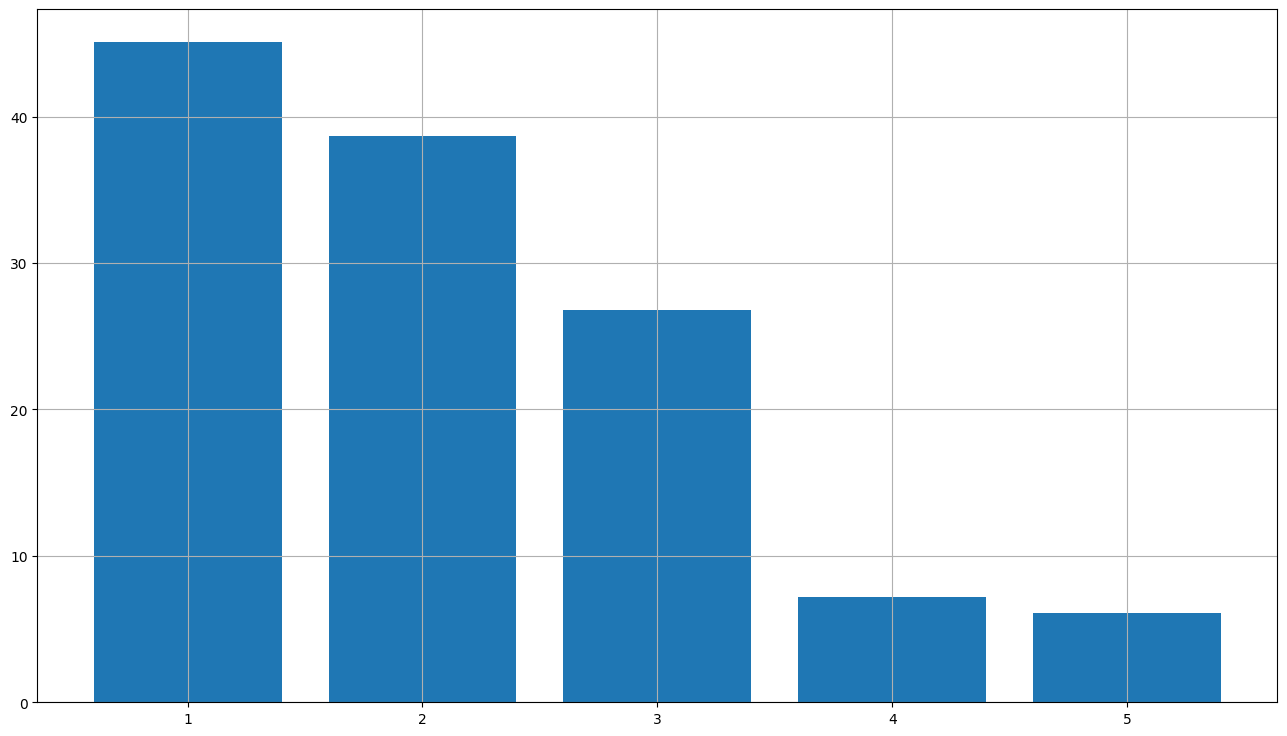

In [144]:
fig = plt.figure(figsize=(16, 9))
axis = fig.add_subplot()
axis.grid()
mass_k = []
for i in range(1, max):
    mass_k.append(i)
plt.bar(mass_k, mass_elbow_value)
for i in range(len(mass_elbow_value)):
    print(f'{i+1} кластер = {mass_elbow_value[i]}')

In [145]:
k = 3
# cluster_centers = [[random.randint(0, 10), random.randint(0,10)]]
cluster_centers = [[6.32, 1.47]]
for l in range(k-1):
    new_mass_point_to_claster = []
    for i in mass:
        new_euclidean_distances = []
        for j in cluster_centers:
            new_euclidean_distances.append(round(math.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2), 2))
        new_mass_point_to_claster.append(new_euclidean_distances)
    maximum = [-1, -1]
    # выбираем самую дальнюю точку
    for i in range(len(new_mass_point_to_claster)):
        long = 0
        for j in new_mass_point_to_claster[i]:
            long += j
        if long > maximum[0] and mass[i] not in cluster_centers:
            maximum = [long, i]
    # добавляем коодинаты новой точки
    cluster_centers.append(mass[maximum[-1]])
cluster_centers[:]

[[6.32, 1.47], [0, 8.0], [9.0, 6.03125]]

In [146]:
mass_point_to_claster = []
for i in mass:
    euclidean_distances = []
    for j in cluster_centers:
        euclidean_distances.append(round(math.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2), 2))
    mass_point_to_claster.append(euclidean_distances)

In [147]:
for i in range(len(mass_point_to_claster)):
    minimum = 999999
    numer = -1
    for j in range(len(mass_point_to_claster[i])):
        if mass_point_to_claster[i][j] < minimum:
            minimum = mass_point_to_claster[i][j]
            numer = j + 1
    mass_point_to_claster[i] = numer
mass_point_to_claster

[3, 2, 3, 3, 2, 3, 2, 1, 2, 2]

In [148]:
# старый центр кластера смещается в его центроид
for z in range(4):
    for i in range(k):
        count = 0
        x_ = 0
        y_ = 0
        for j in range(len(mass)):
            if mass_point_to_claster[j] == i+1:
                count += 1
                x_ += mass[j][0]
                y_ += mass[j][1]
        if x_ != 0:
            cluster_centers[i][0] = x_/count
        else:
            cluster_centers[i][0] = 0
        if y_ != 0:
            cluster_centers[i][1] = y_/count
        else:
            cluster_centers[i][1] = 0
    mass_point_to_claster = []
    for i in mass:
        euclidean_distances = []
        for j in cluster_centers:
            euclidean_distances.append(round(math.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2), 2))
        mass_point_to_claster.append(euclidean_distances)
    for i in range(len(mass_point_to_claster)):
        minimum = 999999
        numer = -1
        for j in range(len(mass_point_to_claster[i])):
            if mass_point_to_claster[i][j] < minimum:
                minimum = mass_point_to_claster[i][j]
                numer = j + 1
        mass_point_to_claster[i] = numer

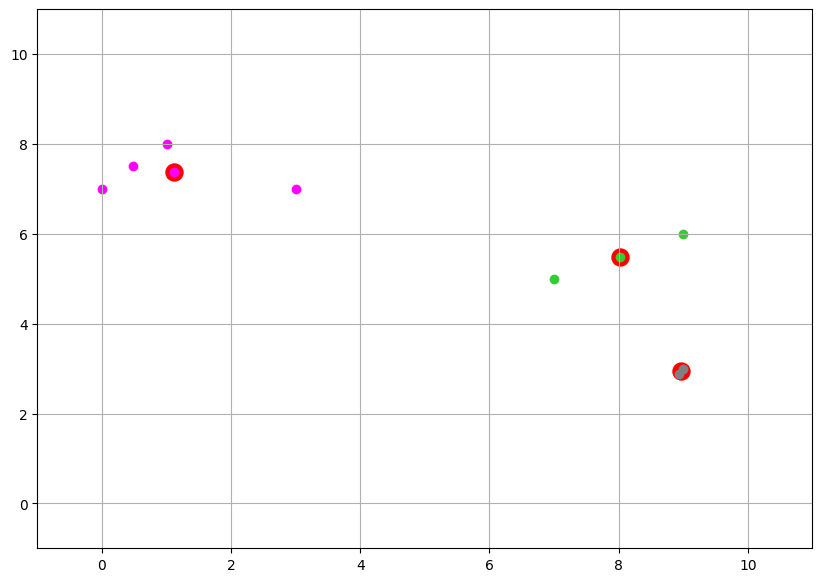

In [149]:
fig = plt.figure(figsize=(10,7), )
ax1 = fig.add_subplot()
for i in range(len(cluster_centers)):
    ax1.scatter(cluster_centers[i][0], cluster_centers[i][1], c='r',s=150)

for i in range(len(mass_point_to_claster)):
    ax1.scatter(mass[i][0],mass[i][1], c=mass_collor[mass_point_to_claster[i]])
ax1.grid()
plt.xlim([-1, 11])
plt.ylim([-1, 11])
plt.show()